In [4]:
! pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 12.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=d991c4963441064ee473532ae2a9cafd6aa3f5a707eb7bb573f423f989459e75
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [2]:
import skfuzzy as fuzz
import skfuzzy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [3]:
print("******** INFORMATION FROM DATASET 1 ********")
dataset_1 = pd.read_csv('data1.csv')
dataset_1

******** INFORMATION FROM DATASET 1 ********


,X,Y,Class
0,5.50,7.00,1
1,9.40,13.00,1
2,6.00,6.80,1
3,12.50,13.00,0
4,5.50,5.60,1
...,...,...,...
207,12.72,12.05,0
208,11.24,9.73,0
209,14.65,10.31,0
210,14.84,10.78,0


In [4]:


scaler_standard = MinMaxScaler()
scaler_standard.fit(dataset_1[['X','Y']])
data_normal = scaler_standard.fit_transform(dataset_1[['X', 'Y']])
dataset_1[['X', 'Y']]= scaler_standard.transform(dataset_1[['X', 'Y']])
print("******** INFORMATION FROM DATASET 1 AFTER NORMALIZE AND FITTING********")
print("")
dataset_1



******** INFORMATION FROM DATASET 1 AFTER NORMALIZE AND FITTING********



,X,Y,Class
0,0.279419,0.434318,1
1,0.481597,0.811439,1
2,0.305340,0.421747,1
3,0.642302,0.811439,0
4,0.279419,0.346323,1
...,...,...,...
207,0.653707,0.751728,0
208,0.576983,0.605908,0
209,0.753758,0.642363,0
210,0.763608,0.671904,0


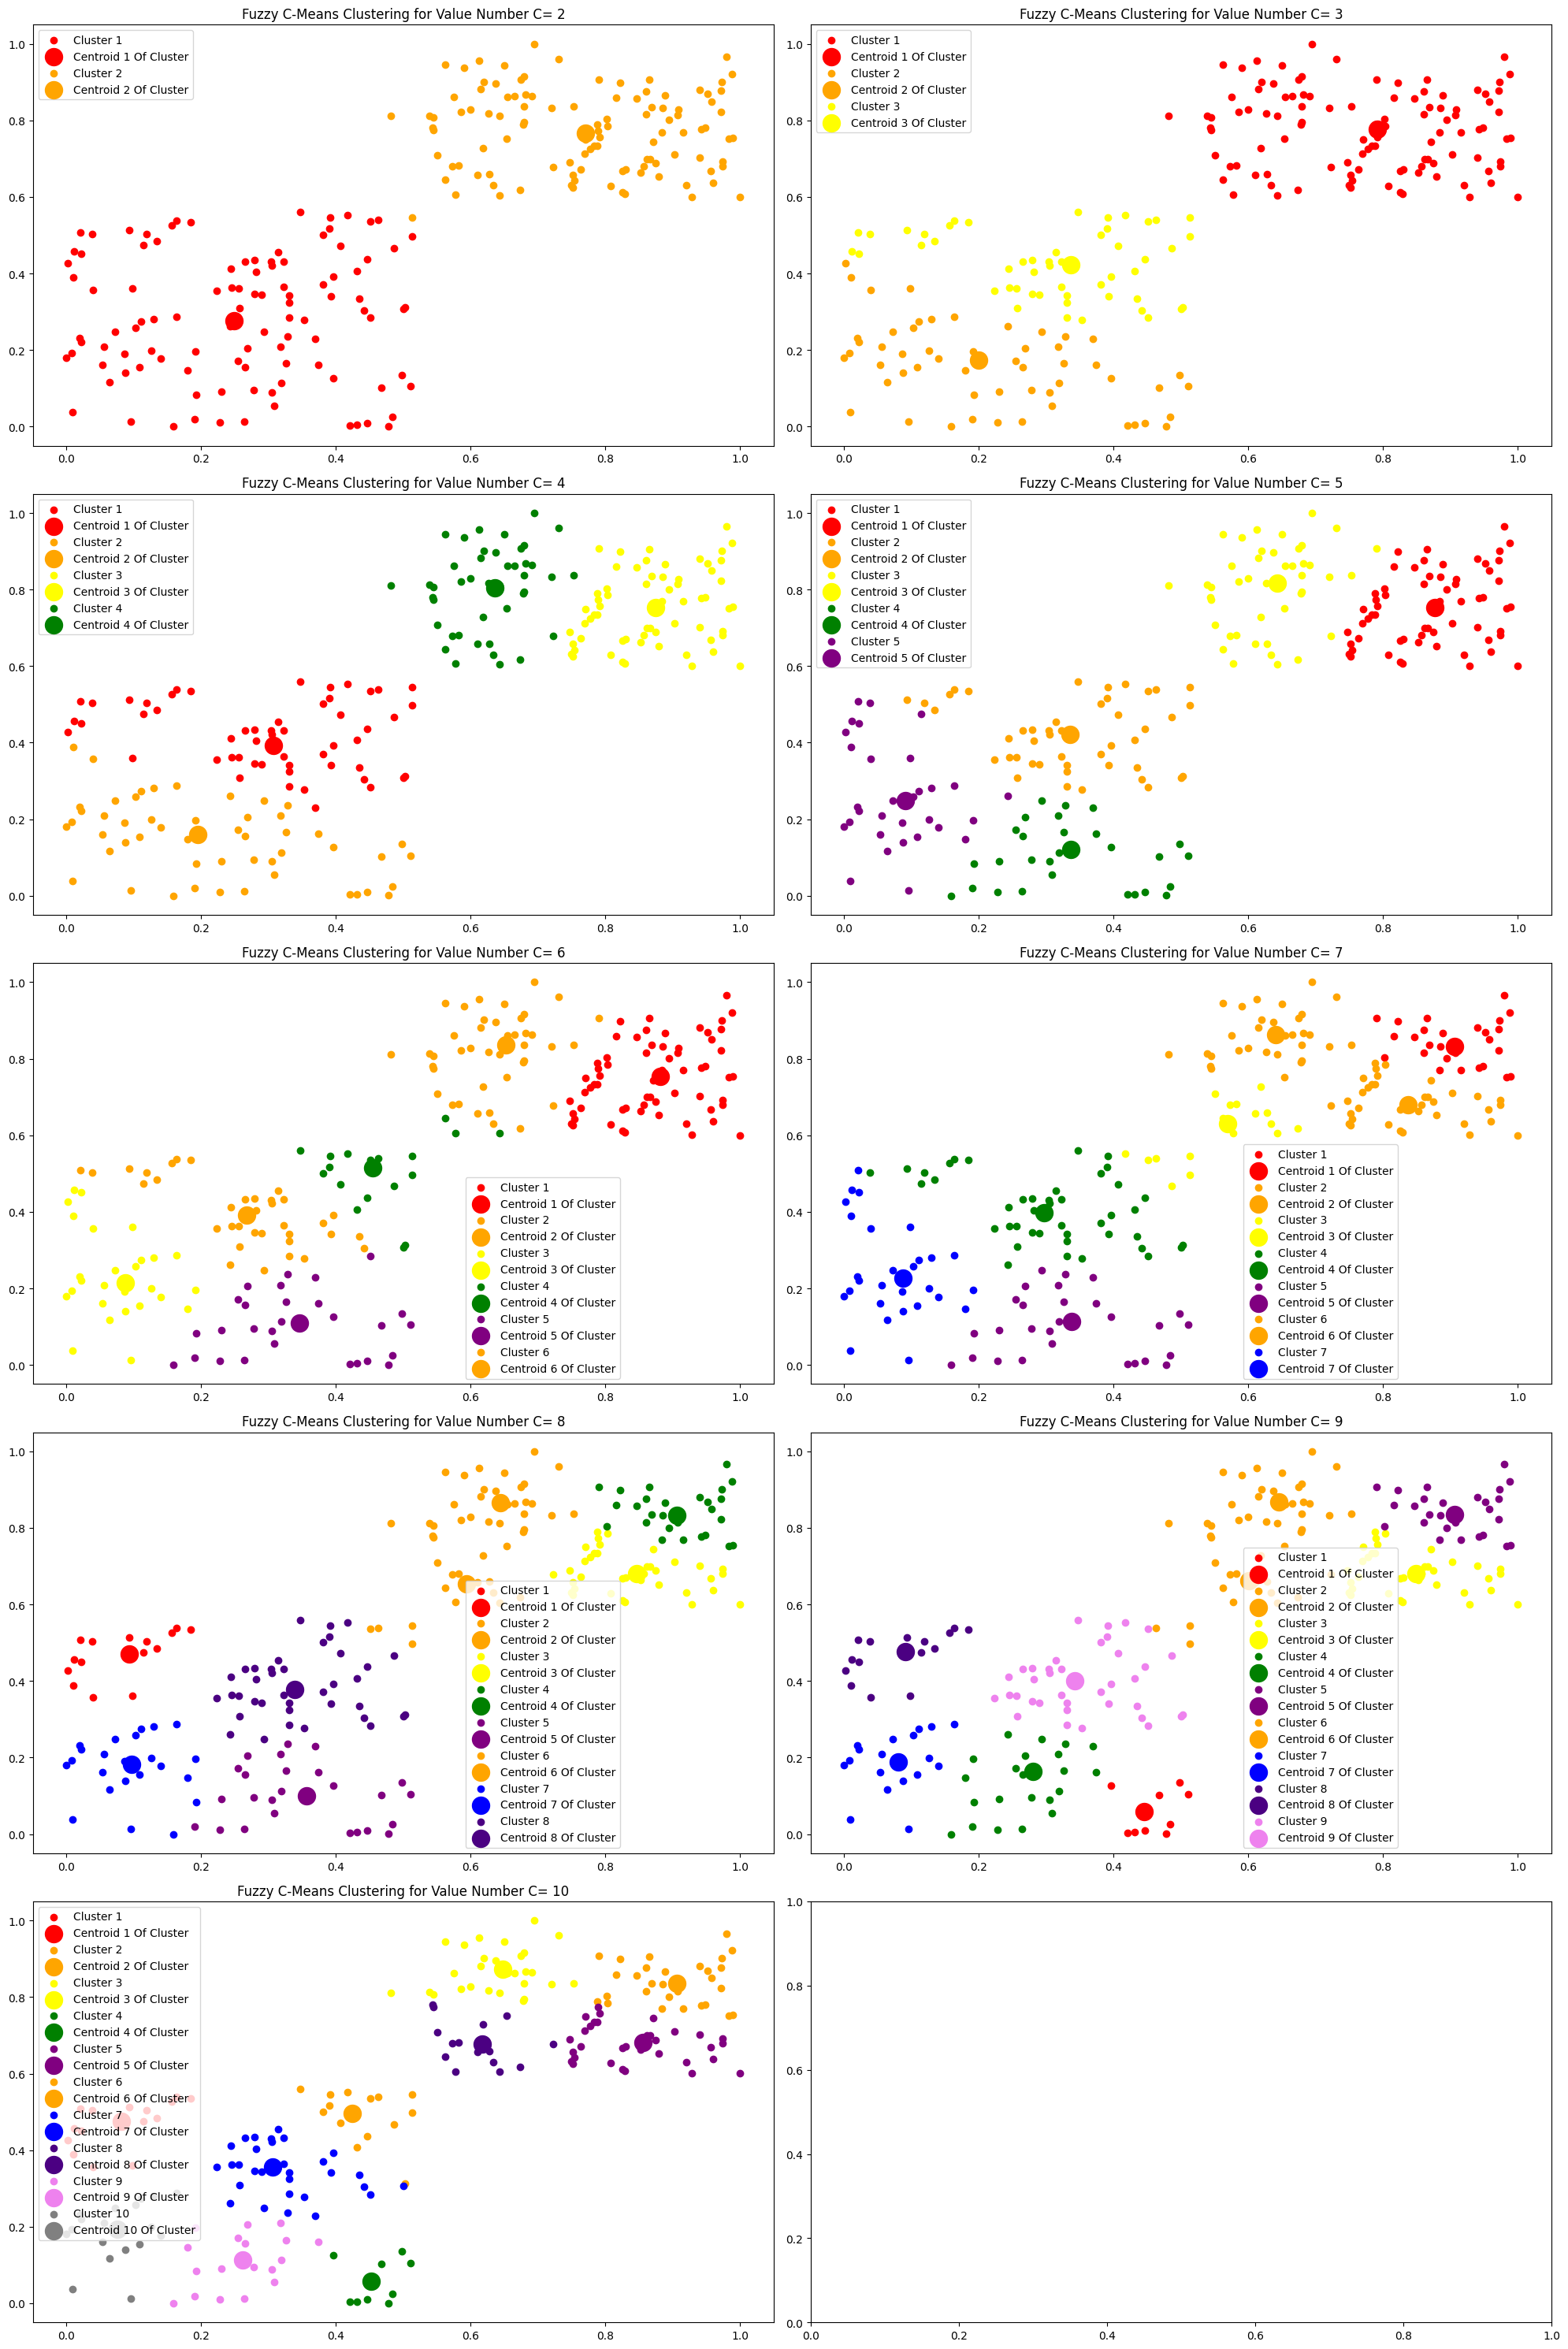

In [5]:


C = range(2, 11)
graph, plot = plt.subplots(5, 2, figsize=(20, 30))
plot = plot.ravel()

Set_color = ['red', 'orange', 'yellow', 'green','purple', 'orange','blue', 'indigo', 'violet', 'gray' ]

for g, number in enumerate(C):
    tmp, n1, n2, n3, n4, n5, n6 = fuzz.cluster.cmeans(data_normal.T, number, m=2, error=0.005, maxiter=1000, init=None)
    mui = np.argmax(n1, axis=0)


    for j in range(number):
        k=0
        h=1
        plot[g].scatter(dataset_1['X'][mui == j],dataset_1['Y'][mui == j],color=Set_color[j],label=f'Cluster {j+1} ')

        plot[g].scatter(tmp[j][k], tmp[j][h], color=Set_color[j], marker='o', s=250, label=f'Centroid {j+1} Of Cluster')


    plot[g].set_title(f'Fuzzy C-Means Clustering for Value Number C= {number}')
    plot[g].legend(loc='best', bbox_to_anchor=(0, 0, 0.8, 1))
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


In [6]:
fval= []
for number in C:
    tmp, n1, n2, n3, n4, n5, n6 = fuzz.cluster.cmeans(data_normal.T, number, m=2, error=0.005, maxiter=1000, init=None)
    fval.append(n6)

C_Best = np.argmax(fval) + 2
FPC = max(fval)
print (f"Best for Value Number C Fuzzy C-Means Clustering  : {C_Best}")
print (f"Best FCP Fuzzy C-Means Clustering  : {FPC}")




Best for Value Number C Fuzzy C-Means Clustering  : 2
Best FCP Fuzzy C-Means Clustering  : 0.8685890005795922


In [7]:
tmp, n1, n2, n3, n4, n5, n6 = fuzz.cluster.cmeans(data_normal.T, number, m=2, error=0.005, maxiter=1000, init=None)
mui = np.argmax(n1, axis=0)
dataset_1 = pd.read_csv('data1.csv')
dataset_1['Cluster Class'] = mui
dataset_1

,X,Y,Class,Cluster Class
0,5.50,7.00,1,8
1,9.40,13.00,1,3
2,6.00,6.80,1,8
3,12.50,13.00,0,3
4,5.50,5.60,1,8
...,...,...,...,...
207,12.72,12.05,0,7
208,11.24,9.73,0,7
209,14.65,10.31,0,1
210,14.84,10.78,0,1


In [8]:

def calculate_fpc(data_normal , number):
    tmp, n1, n2, n3, n4, n5, FPC_val = skfuzzy.cluster.cmeans(data_normal.T, c, 2, error=0.005, maxiter=1000, init=None)
    return FPC_val

In [9]:
data = dataset_1[['X', 'Y']].values
for c in range(2, 11):
    FPC_val = calculate_fpc(data, c)
    print(f"FPC FOR {c} CLUSTER: ",FPC_val)


FPC FOR 2 CLUSTER:  0.8675806299252573
FPC FOR 3 CLUSTER:  0.7226189491677051
FPC FOR 4 CLUSTER:  0.6595700051903182
FPC FOR 5 CLUSTER:  0.6283082327120313
FPC FOR 6 CLUSTER:  0.586752561581906
FPC FOR 7 CLUSTER:  0.5653359923683066
FPC FOR 8 CLUSTER:  0.5586120352742678
FPC FOR 9 CLUSTER:  0.5329912798319381
FPC FOR 10 CLUSTER:  0.5276821285057088


**Data Set 2**

In [10]:
print("******** INFORMATION FROM DATASET 1 ********")
dataset_2 = pd.read_csv('data2.csv')
dataset_2

******** INFORMATION FROM DATASET 1 ********


,X,Y,Class
0,-0.842046,0.408155,0
1,0.096394,-0.852114,1
2,-0.964828,0.034454,0
3,-0.164699,0.817332,1
4,0.274231,0.756343,1
...,...,...,...
295,-0.526197,0.815028,0
296,0.832952,0.086819,1
297,-0.900569,-0.555313,0
298,-0.534179,-0.513472,1


In [11]:

# scaler = StandardScaler()
# df[["x1", "x2"]] = scaler.fit_transform(df[["x1", "x2"]])
scaler_standard = MinMaxScaler()
scaler_standard.fit(dataset_2[['X','Y']])
data_normal = scaler_standard.fit_transform(dataset_2[['X', 'Y']])
dataset_2[['X', 'Y']]= scaler_standard.transform(dataset_2[['X', 'Y']])
print("******** INFORMATION FROM DATASET 1 AFTER NORMALIZE AND FITTING********")
print("")
dataset_2



******** INFORMATION FROM DATASET 1 AFTER NORMALIZE AND FITTING********



,X,Y,Class
0,0.111887,0.695514,0
1,0.553537,0.094573,1
2,0.054103,0.517320,0
3,0.430661,0.890623,1
4,0.637230,0.861541,1
...,...,...,...
295,0.260532,0.889525,0
296,0.900176,0.542289,1
297,0.084345,0.236098,0
298,0.256775,0.256050,1


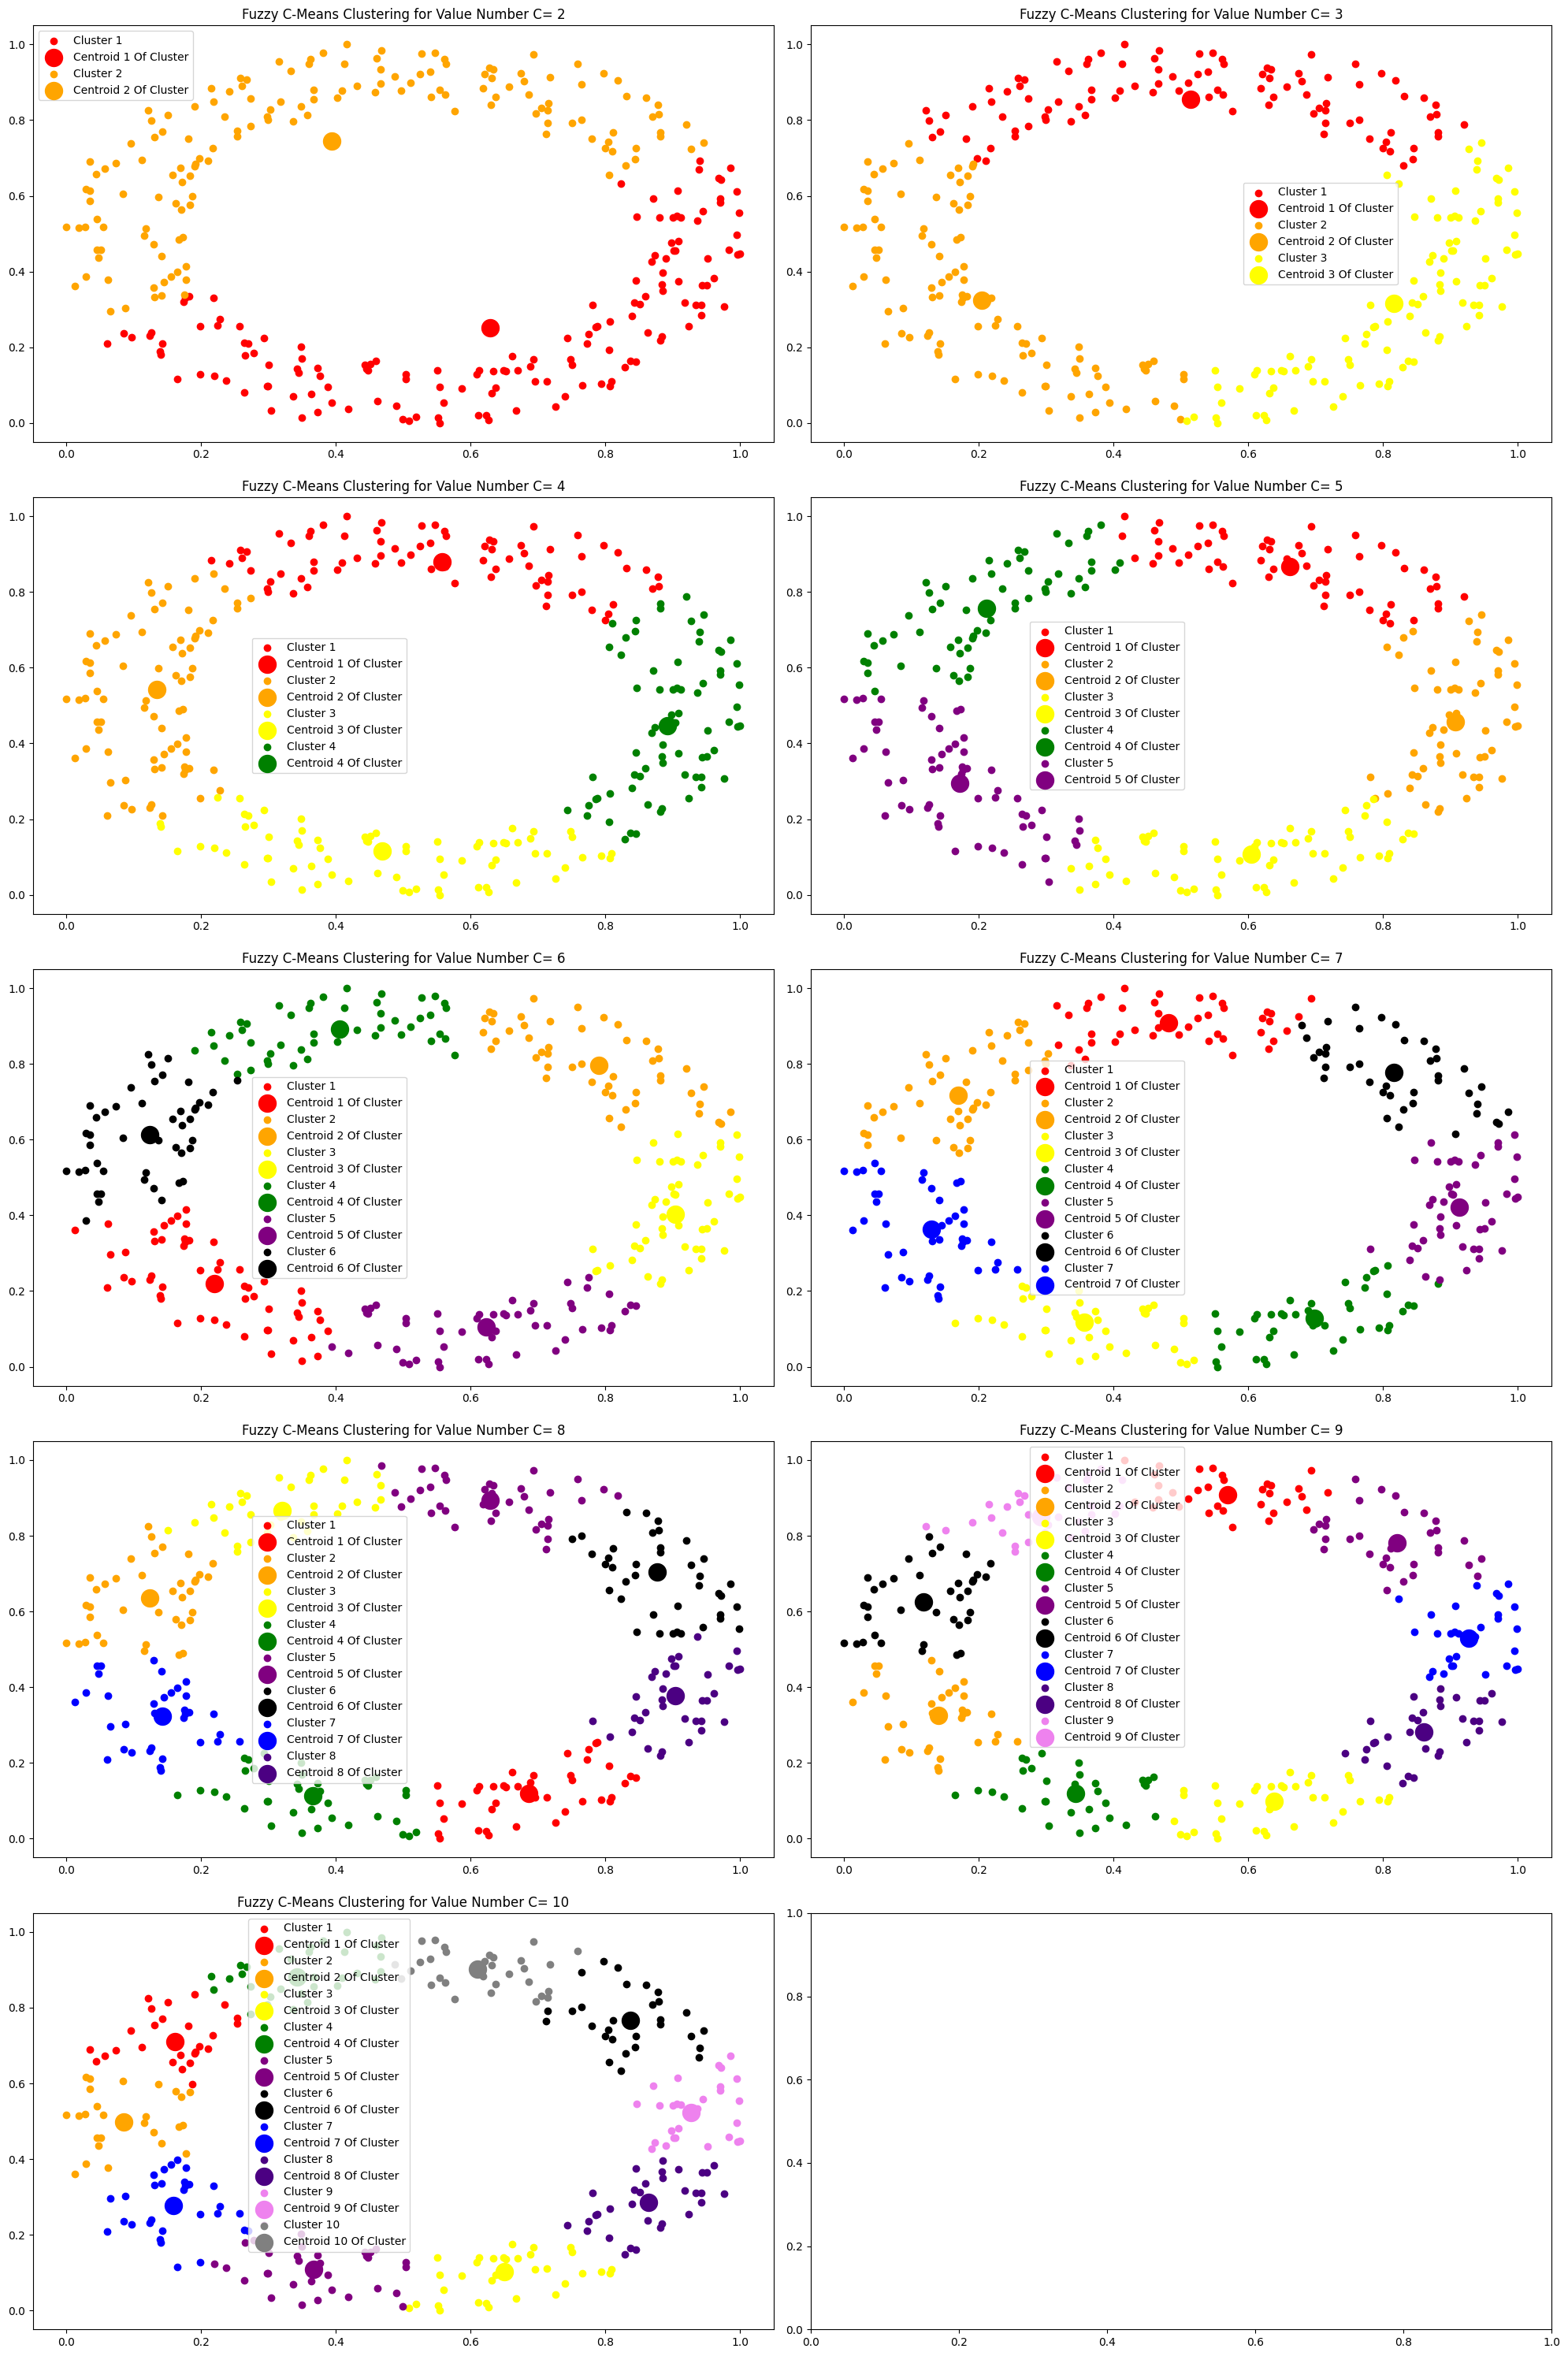

In [12]:
import matplotlib.cm as cm

C = range(2, 11)
graph, plot = plt.subplots(5, 2, figsize=(20, 30))
plot = plot.ravel()

Set_color = ['red', 'orange', 'yellow', 'green','purple', 'black','blue', 'indigo', 'violet', 'gray' ]

for g, number in enumerate(C):
    tmp, n1, n2, n3, n4, n5, n6 = fuzz.cluster.cmeans(data_normal.T, number, m=2, error=0.005, maxiter=1000, init=None)
    mui = np.argmax(n1, axis=0)


    for j in range(number):
        k=0
        h=1
        plot[g].scatter(dataset_2['X'][mui == j],dataset_2['Y'][mui == j],color=Set_color[j],label=f'Cluster {j+1} ')

        plot[g].scatter(tmp[j][k], tmp[j][h], color=Set_color[j], marker='o', s=250, label=f'Centroid {j+1} Of Cluster')


    plot[g].set_title(f'Fuzzy C-Means Clustering for Value Number C= {number}')
    plot[g].legend(loc='best', bbox_to_anchor=(0, 0, 0.8, 1))
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


In [13]:
fval= []
for number in C:
    tmp, n1, n2, n3, n4, n5, n6 = fuzz.cluster.cmeans(data_normal.T, number, m=2, error=0.005, maxiter=1000, init=None)
    fval.append(n6)

C_Best = np.argmax(fval) + 2
FPC = max(fval)
print (f"Best for Value Number C Fuzzy C-Means Clustering  : {C_Best}")
print (f"Best FCP Fuzzy C-Means Clustering  : {FPC}")




Best for Value Number C Fuzzy C-Means Clustering  : 2
Best FCP Fuzzy C-Means Clustering  : 0.7066684206440277


In [14]:
tmp, n1, n2, n3, n4, n5, n6 = fuzz.cluster.cmeans(data_normal.T, number, m=2, error=0.005, maxiter=1000, init=None)
mui = np.argmax(n1, axis=0)
dataset_2 = pd.read_csv('data2.csv')
dataset_2['Cluster Class'] = mui
dataset_2

,X,Y,Class,Cluster Class
0,-0.842046,0.408155,0,1
1,0.096394,-0.852114,1,8
2,-0.964828,0.034454,0,1
3,-0.164699,0.817332,1,7
4,0.274231,0.756343,1,2
...,...,...,...,...
295,-0.526197,0.815028,0,9
296,0.832952,0.086819,1,3
297,-0.900569,-0.555313,0,4
298,-0.534179,-0.513472,1,4


In [15]:

def calculate_fpc(data_normal , number):
    tmp, n1, n2, n3, n4, n5, FPC_val = skfuzzy.cluster.cmeans(data_normal.T, c, 2, error=0.005, maxiter=1000, init=None)
    return FPC_val

In [16]:
data = dataset_2[['X', 'Y']].values
for c in range(2, 11):
    FPC_val = calculate_fpc(data, c)
    print(f"FPC FOR {c} CLUSTER: ",FPC_val)


FPC FOR 2 CLUSTER:  0.7071727584497854
FPC FOR 3 CLUSTER:  0.67741452953216
FPC FOR 4 CLUSTER:  0.6601730150616864
FPC FOR 5 CLUSTER:  0.6500430659530522
FPC FOR 6 CLUSTER:  0.6321970268475278
FPC FOR 7 CLUSTER:  0.6230334479793931
FPC FOR 8 CLUSTER:  0.6117319950365167
FPC FOR 9 CLUSTER:  0.5954085467625169
FPC FOR 10 CLUSTER:  0.5749965637799976
